# Kaggle : Airbnb New User Bookings

In [5]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# data

# sessions

In [31]:
#10M data
sessions = pd.read_csv("data/sessions.csv")
sessions.head(15)

user_id            action action_type            action_detail  \
0   d1mm9tcy42            lookup         NaN                      NaN   
1   d1mm9tcy42    search_results       click      view_search_results   
2   d1mm9tcy42            lookup         NaN                      NaN   
3   d1mm9tcy42    search_results       click      view_search_results   
4   d1mm9tcy42            lookup         NaN                      NaN   
5   d1mm9tcy42    search_results       click      view_search_results   
6   d1mm9tcy42            lookup         NaN                      NaN   
7   d1mm9tcy42       personalize        data  wishlist_content_update   
8   d1mm9tcy42             index        view      view_search_results   
9   d1mm9tcy42            lookup         NaN                      NaN   
10  d1mm9tcy42    search_results       click      view_search_results   
11  d1mm9tcy42            lookup         NaN                      NaN   
12  d1mm9tcy42       personalize        data  wishlist_content_update   
13  d1mm9tcy42             index        view      view_search_results   
14  d1mm9tcy42  similar_listings        data         similar_listings   

        device_type  secs_elapsed  
0   Windows Desktop         319.0  
1   Windows Desktop       67753.0  
2   Windows Desktop         301.0  
3   Windows Desktop       22141.0  
4   Windows Desktop         435.0  
5   Windows Desktop        7703.0  
6   Windows Desktop         115.0  
7   Windows Desktop         831.0  
8   Windows Desktop       20842.0  
9   Windows Desktop         683.0  
10  Windows Desktop       59274.0  
11  Windows Desktop          95.0  
12  Windows Desktop        1399.0  
13  Windows Desktop       74886.0  
14  Windows Desktop         255.0

In [32]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [8]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [9]:
#359 action type
sessions['action'].value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

In [10]:
sessions['action_type'].value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [11]:
#155 action detail
sessions['action_detail'].value_counts()

view_search_results               1776885
p3                                1376550
-unknown-                         1031141
wishlist_content_update            706824
user_profile                       656839
change_trip_characteristics        487744
similar_listings                   364624
user_social_connections            336799
update_listing                     269779
listing_reviews                    269021
dashboard                          152952
user_wishlists                     152672
header_userpic                     141830
message_thread                     132395
edit_profile                       108686
message_post                        87103
contact_host                        81041
unavailable_dates                   77795
confirm_email_link                  58422
create_user                         54878
change_contact_host_dates           52517
user_profile_content_update         50434
user_reviews                        49665
p5                                

In [12]:
sessions['secs_elapsed'].describe()

count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

# age_gender_bkts

In [13]:
#21 age bucket (5 years) per gender by country
#1K unit
age_gender = pd.read_csv("data/age_gender_bkts.csv")
age_gender.head()

age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0

In [14]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


# countries (destination)

- AU = austrailia
- CA = canada
- DE = germany
- ES = spain
- FR = france
- GB = england
- IT = italia
- NL = netherland 
- PT = Portugal
- US = USA

In [15]:
countries = pd.read_csv("data/countries.csv")
countries

country_destination  lat_destination  lng_destination  distance_km  \
0                  AU       -26.853388       133.275160   15297.7440   
1                  CA        62.393303       -96.818146    2828.1333   
2                  DE        51.165707        10.452764    7879.5680   
3                  ES        39.896027        -2.487694    7730.7240   
4                  FR        46.232193         2.209667    7682.9450   
5                  GB        54.633220        -3.432277    6883.6590   
6                  IT        41.873990        12.564167    8636.6310   
7                  NL        52.133057         5.295250    7524.3203   
8                  PT        39.553444        -7.839319    7355.2534   
9                  US        36.966427       -95.844030       0.0000   

   destination_km2 destination_language   language_levenshtein_distance  
0        7741220.0                   eng                           0.00  
1        9984670.0                   eng                           0.00  
2         357022.0                   deu                          72.61  
3         505370.0                   spa                          92.25  
4         643801.0                   fra                          92.06  
5         243610.0                   eng                           0.00  
6         301340.0                   ita                          89.40  
7          41543.0                   nld                          63.22  
8          92090.0                   por                          95.45  
9        9826675.0                   eng                           0.00

In [33]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [16]:
countries['country_destination'].value_counts()

US    1
NL    1
AU    1
CA    1
FR    1
PT    1
ES    1
IT    1
GB    1
DE    1
Name: country_destination, dtype: int64

# submission

In [17]:
# submission = pd.read_csv("data/sample_submission_NDF.csv")
# submission.head()

In [18]:
# submission.info()

# test

In [19]:
test = pd.read_csv("data/test_users.csv")
test.head()

id date_account_created  timestamp_first_active  \
0  5uwns89zht           2014-07-01          20140701000006   
1  jtl0dijy2j           2014-07-01          20140701000051   
2  xx0ulgorjt           2014-07-01          20140701000148   
3  6c6puo6ix0           2014-07-01          20140701000215   
4  czqhjk3yfe           2014-07-01          20140701000305   

   date_first_booking     gender   age signup_method  signup_flow language  \
0                 NaN     FEMALE  35.0      facebook            0       en   
1                 NaN  -unknown-   NaN         basic            0       en   
2                 NaN  -unknown-   NaN         basic            0       en   
3                 NaN  -unknown-   NaN         basic            0       en   
4                 NaN  -unknown-   NaN         basic            0       en   

  affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0            direct             direct               untracked      Moweb   
1            direct             direct               untracked      Moweb   
2            direct             direct                  linked        Web   
3            direct             direct                  linked        Web   
4            direct             direct               untracked        Web   

  first_device_type  first_browser  
0            iPhone  Mobile Safari  
1            iPhone  Mobile Safari  
2   Windows Desktop         Chrome  
3   Windows Desktop             IE  
4       Mac Desktop         Safari

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 14 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62096 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 6.6+ MB


In [20]:
test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

# train

In [21]:
train = pd.read_csv("data/train_users_2.csv")
train.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [22]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 15 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    213451 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 24.4+ MB


# drop date_first_booking column

In [23]:
train = train.drop(labels=['date_first_booking'], axis=1)
test = test.drop(labels=['date_first_booking'], axis=1)

# first_affiliate_tracked nan data manipulation

In [24]:
train['first_affiliate_tracked'] = train.first_affiliate_tracked.replace(np.nan, "untracked")
test['first_affiliate_tracked'] = test.first_affiliate_tracked.replace(np.nan, "untracked")

# age

In [25]:
print(len(train[train['age'] > 120]))

781


In [26]:
train[train['age'] > 120]

id date_account_created  timestamp_first_active     gender  \
388     v2x0ms9c62           2010-04-11          20100411065602  -unknown-   
673     umf1wdk9uc           2010-05-25          20100525155541     FEMALE   
1040    m82epwn7i8           2010-07-14          20100714230556       MALE   
1177    2th813zdx7           2010-07-25          20100725234419       MALE   
1200    3amf04n3o3           2010-07-27          20100727190447     FEMALE   
1239    6vpmryt377           2010-07-30          20100730055204     FEMALE   
1257    uxy91xb5p2           2010-08-01          20100801071023       MALE   
1308    bno0vva4uz           2010-08-06          20100806133725       MALE   
1474    h3rrmak4tu           2010-08-21          20100821225214       MALE   
1502    fou0j7fhnm           2010-08-24          20100824205045     FEMALE   
1826    kfeh5350pi           2010-09-21          20100921134556  -unknown-   
1860    9aouhu15rk           2010-09-23          20100923114758     FEMALE   
2582    aq0lqrjf2y           2010-12-06          20101206173457  -unknown-   
3818    1w7fdi5pxc           2011-03-22          20110322000910     FEMALE   
4292    8yv90v3y1f           2011-04-17          20110417062116     FEMALE   
5091    0pyobdy4pq           2011-05-23          20110523195033       MALE   
5331    ezqp4a8cmw           2011-06-02          20110602005444  -unknown-   
5549    dguhdfl2l2           2011-06-10          20110610005853     FEMALE   
5638    l56119iwg5           2011-06-13          20110613041718     FEMALE   
5706    w3fb6io74e           2011-06-15          20110615061029  -unknown-   
5710    ybblb7wzh8           2011-06-15          20110615085200     FEMALE   
5735    bbt3xydhoj           2011-06-16          20110616024716     FEMALE   
5989    k1j9tg9tz2           2011-06-27          20110627012116       MALE   
6695    fv4mcbvonv           2011-07-19          20110719165328       MALE   
6925    8smg1h6o7t           2011-07-26          20110726183314     FEMALE   
7097    n2wz02fa45           2011-07-31          20110731100727     FEMALE   
7185    t92xz5zq9f           2011-08-02          20110802162143     FEMALE   
7360    i4ko79m5l9           2011-08-07          20110807105600       MALE   
7505    ivpksyyguz           2011-08-11          20110811204428       MALE   
7785    bcfxgkh3ih           2011-08-17          20110817211154     FEMALE   
...            ...                  ...                     ...        ...   
178263  bydzt91acn           2014-04-21          20140421050021     FEMALE   
178579  gme5odaoy8           2014-04-21          20140421234136       MALE   
178653  k33mpzbchn           2014-04-22          20140422015333     FEMALE   
178729  wr20jy7x3b           2014-04-22          20140422042232     FEMALE   
179208  2ixvfk5v5w           2014-04-23          20140423031937     FEMALE   
179811  f7035f79ea           2014-04-24          20140424050058       MALE   
180869  d1v4vv3xj3           2014-04-26          20140426191252  -unknown-   
180945  ctacxe4tmz           2014-04-26          20140426222816       MALE   
180961  i3lxdnv96j           2014-04-26          20140426233511  -unknown-   
180995  sraouk5dve           2014-04-27          20140427010427     FEMALE   
181662  6y8021owam           2014-04-28          20140428182658     FEMALE   
183122  bvt6c1d6uy           2014-05-01          20140501173930       MALE   
183562  hg0kddg0sp           2014-05-02          20140502154859       MALE   
184424  it9bzkxnhn           2014-05-04          20140504195714     FEMALE   
186021  veqakklrd0           2014-05-08          20140508002338     FEMALE   
187389  96qhdng772           2014-05-11          20140511054231     FEMALE   
188301  65tk02k88o           2014-05-13          20140513044602     FEMALE   
189661  05d3awab7r           2014-05-15          20140515072102       MALE   
190142  1nxkmkw8s7           2014-05-16          20140516064946       MALE   
190412  dgg8f0n573           2014-05-1

In [27]:
train_copy = train.copy()
train_copy = train_copy[train_copy['age'] <= 120]
train_copy.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

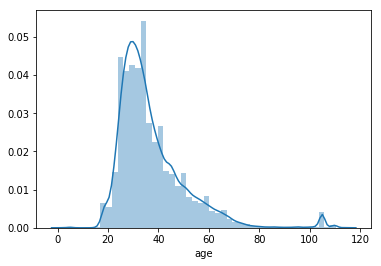

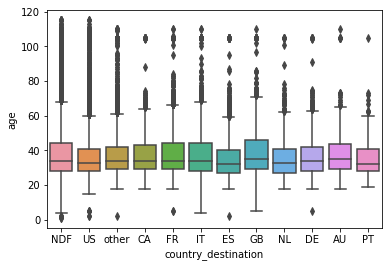

In [28]:
train_copy = train.copy()
train_copy = train_copy.dropna()
train_copy = train_copy[train_copy['age'] <= 120]

ax1 = sns.distplot(train_copy['age'])
plt.show()
ax2 = sns.boxplot(x = train_copy['country_destination'], y = train_copy['age'], data = train_copy)
plt.show()
# ax3 = sns.swarmplot(x = train_copy['country_destination'], y = train_copy['age'], data = train_copy)
# plt.show()

# age nan value manipulation

- DBSCAN
- heatmap age vs related features

# pre processing

In [2]:
import pandas as pd

In [3]:
df_sample = pd.read_csv('data/sample_submission_NDF.csv')

In [4]:
df_train = pd.read_csv("data/train_users_2.csv")
df_test = pd.read_csv("data/test_users.csv")
df_all = pd.concat([df_train, df_test])

In [5]:
df_target = df_train["country_destination"]
df_values = df_train["country_destination"].values

In [6]:
df_all = df_all.drop("age", axis = 1)
df_all = df_all.drop("date_first_booking", axis = 1)

In [7]:
df_all["first_affiliate_tracked"].fillna("untracked", inplace = True)

In [8]:
df_all.isnull().sum()

affiliate_channel              0
affiliate_provider             0
country_destination        62096
date_account_created           0
first_affiliate_tracked        0
first_browser                  0
first_device_type              0
gender                         0
id                             0
language                       0
signup_app                     0
signup_flow                    0
signup_method                  0
timestamp_first_active         0
dtype: int64

In [9]:
df_all["date_account_created"] = pd.to_datetime(df_all["date_account_created"], format = "%Y-%m-%d")

In [10]:
df_all["timestamp_first_active"] = pd.to_datetime(df_all["timestamp_first_active"], format="%Y%m%d%H%M%S", errors='ignore')

In [11]:
df_all["ac_year"] = df_all["date_account_created"].apply(lambda x : x.year)
df_all["ac_month"] = df_all["date_account_created"].apply(lambda x : x.month)
df_all["ac_day"] = df_all["date_account_created"].apply(lambda x : x.day)

In [12]:
df_all["fa_year"] = df_all["timestamp_first_active"].apply(lambda x : x.year)
df_all["fa_month"] = df_all["timestamp_first_active"].apply(lambda x : x.month)
df_all["fa_day"] = df_all["timestamp_first_active"].apply(lambda x : x.day)
df_all["fa_hour"] = df_all["timestamp_first_active"].apply(lambda x : x.hour)
df_all["fa_minute"] = df_all["timestamp_first_active"].apply(lambda x : x.minute)
df_all["fa_second"] = df_all["timestamp_first_active"].apply(lambda x : x.second)

In [13]:
df_all = df_all.drop("date_account_created", axis = 1)
df_all = df_all.drop("timestamp_first_active", axis = 1)
df_all = df_all.drop("country_destination", axis = 1)

In [14]:
df_all = df_all.drop("id", axis = 1)

In [15]:
df_all = pd.get_dummies(df_all)

In [16]:
df_train = df_all.iloc[:213451]
df_test = df_all.iloc[213451:]

In [17]:
df_train.shape, df_test.shape, df_target.shape

((213451, 145), (62096, 145), (213451,))

In [18]:
df_target.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [19]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_label = le.fit_transform(df_target) 

In [39]:
y_label

array([ 7,  7, 10, ...,  7,  7,  7])

# age column

In [112]:
test_age = pd.read_csv("last_test_data.csv")
train_age = pd.read_csv("last_train_data.csv")

test_age = test_age['age']
train_age = train_age['age']

In [113]:
train_age.head(), len(train_age)

(0    45.0
 1    38.0
 2    56.0
 3    42.0
 4    41.0
 Name: age, dtype: float64, 213451)

In [114]:
test_age.head(), len(test_age)

(0    35.0
 1    45.0
 2    30.0
 3    45.0
 4    30.0
 Name: age, dtype: float64, 62096)

In [115]:
df_train = pd.concat([df_train, train_age], axis=1)
df_test = pd.concat([df_test, test_age], axis=1)

df_train.info(), df_test.info(), 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Columns: 146 entries, signup_flow to age
dtypes: float64(1), int64(10), uint8(135)
memory usage: 47.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62096 entries, 0 to 62095
Columns: 146 entries, signup_flow to age
dtypes: float64(1), int64(10), uint8(135)
memory usage: 13.7 MB


(None, None)

# age clustering

In [39]:
# df_all = pd.concat([df_train, df_test], axis=0)
# df_all.head()


In [40]:
# def pre_age_predict_data_cat():
    
#     bins = [0, 15, 25, 35, 60, 9999]
#     labels = ["미성년자", "청년", "중년", "장년", "노년"]
#     cats = pd.cut(df_all['age'], bins, labels=labels)
#     cats = pd.DataFrame(cats)
    
#     return cats

# cats=pre_age_predict_data_cat()

# cats_d = pd.get_dummies(cats)

# len(cats_d)

In [41]:
# train_cat = cats_d[:213451]
# test_cat = cats_d[213451:]

# # df_train = df_train.drop("age", axis=1)
# # df_test = df_test.drop("age", axis=1)

# df_train = pd.concat([df_train, train_cat], axis=1)
# df_test = pd.concat([df_test, test_cat], axis=1)

# # df_train.to_csv('df_train.csv', sep=',', na_rep='NaN', index = False)
# # df_test.to_csv('df_test.csv', sep=',', na_rep='NaN', index = False)

# sessions

In [42]:
sessions.head()

user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

In [86]:
group = sessions.groupby('user_id')['action', 'action_type'].agg(['count'])
print(len(group))

group.head(10)

135483


action action_type
            count       count
user_id                      
00023iyk9l     39          37
0010k6l0om     63          48
001wyh0pz8     90          85
0028jgx1x1     31          31
002qnbzfs5    782         712
0031awlkjq      8           8
0035hobuyj    486         318
00378ocvlh     74          71
00389675gq    175         163
003iamz20l    163         157

In [ ]:
df_train = pd.read_csv("data/train_users_2.csv")
df_test = pd.read_csv("data/test_users.csv")
df_all = pd.concat([df_train, df_test])

In [79]:
df_all = df_all.merge(group, left_on='lkey', how = 'outer')
df_all.head()

TypeError: object of type 'NoneType' has no len()

# Logistic Regression

In [79]:
from sklearn import linear_model

In [80]:
model_log = linear_model.LogisticRegression(n_jobs=-1, random_state=0).fit(df_train, y_label)

# we create an instance of Neighbours Classifier and fit the data.
# model_log = logreg.fit(df_train, y_label)

In [62]:
# y_pred_log = model_log.predict(df_test)
# y_inverse_log = le.inverse_transform(y_pred_log)
# y_inverse_log
# df_sample['country'] = y_inverse_log
# df_sample = df_sample.reset_index(drop=True)
# df_sample.to_csv('sub_log.csv', sep=',', na_rep='NaN', index = False)
#0.69443 #1200/1460

In [63]:
#predict_proba
y_log1 = model_log.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_log1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_log1.csv', sep=',', na_rep='NaN', index = False)
#0.85906
df_sample1.country.value_counts()

NDF      62096
other    62096
US       62096
FR       62096
IT       47471
ES        8161
GB        5900
DE         445
CA         119
Name: country, dtype: int64

# QDA / LDA

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
qda = QuadraticDiscriminantAnalysis().fit(df_train, y_label)

In [ ]:
#predict_proba
y_qda1 = qda.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_qda1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_qda1.csv', sep=',', na_rep='NaN', index = False)


df_sample1.country.value_counts()

In [ ]:
# y_qda = qda.predict(df_test)
# y_inverse_qda = le.inverse_transform(y_qda)
# y_inverse_qda

# df_sample['country'] = y_inverse_qda
# df_sample = df_sample.reset_index(drop=True)
# df_sample.to_csv('sub_qda.csv', sep=',', na_rep='NaN', index = False)
# #0.00289 #1300/1460

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis().fit(df_train, y_label)

In [ ]:
#predict_proba
y_lda1 = lda.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_lda1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_lda1.csv', sep=',', na_rep='NaN', index = False)
#0.85654
df_sample1.country.value_counts()

In [ ]:
# y_lda = lda.predict(df_test)
# y_inverse_lda = le.inverse_transform(y_lda)
# y_inverse_lda

# df_sample['country'] = y_inverse_lda
# df_sample = df_sample.reset_index(drop=True)
# df_sample.to_csv('sub_lda.csv', sep=',', na_rep='NaN', index = False)
# #0.68756 #1210/1460

# Naive Bayesian

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_nb = MultinomialNB().fit(df_train, y_label)

In [ ]:
#predict_proba
y_nb1 = model_nb.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_lda1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_nb1.csv', sep=',', na_rep='NaN', index = False)
#0.85654
df_sample1.country.value_counts()

In [ ]:
# y_nb = model_nb.predict(df_test)
# y_inverse_nb = le.inverse_transform(y_nb)
# y_inverse_nb

# df_sample['country'] = y_inverse_nb
# df_sample = df_sample.reset_index(drop=True)
# df_sample.to_csv('sub_nb.csv', sep=',', na_rep='NaN', index = False)
# #0.54326 #1260/1460

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
#max_depth = 10 is the best score
model_tree1 = DecisionTreeClassifier(max_depth=4).fit(df_train, y_label)

In [59]:
#predict_proba
y_tree1 = model_tree1.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_tree1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_tree1.csv', sep=',', na_rep='NaN', index = False)
#0.85856
df_sample1.country.value_counts()

NDF      62096
other    62096
US       62096
FR       62096
IT       61960
CA          70
NL          66
Name: country, dtype: int64

In [ ]:
# y_tree = tree1.predict(df_test)
# y_inverse_tree = le.inverse_transform(y_tree)
# y_inverse_tree

# df_sample['country'] = y_inverse_tree
# df_sample = df_sample.reset_index(drop=True)
# df_sample.to_csv('sub_tree.csv', sep=',', na_rep='NaN', index = False)
# #0.69341 #1200/1460

# randomforest

In [52]:
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [81]:
model_random = RandomForestClassifier(n_jobs=-1,max_depth=4, random_state=0).fit(df_train, y_label)

In [54]:
#predict_proba
y_random1 = model_random.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_random1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_random1.csv', sep=',', na_rep='NaN', index = False)
#0.85346

In [ ]:
y_random = model_random.predict(df_test)
y_inverse_random = le.inverse_transform(y_random)
y_inverse_random

In [ ]:
df_sample['country'] = y_inverse_random
df_sample = df_sample.reset_index(drop=True)
df_sample.to_csv('sub_random.csv', sep=',', na_rep='NaN', index = False)
#0.67929 #1250/1460

In [ ]:
df_sample.country.value_counts()

# extratree

In [96]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model_extra = ExtraTreesClassifier(n_jobs=-1, max_depth=4, random_state=0).fit(df_train, y_label)

In [ ]:
#predict_proba
y_extra1 = model_extra.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_extra1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_extra1.csv', sep=',', na_rep='NaN', index = False)
#0.85359

# support vector machine

In [ ]:
from sklearn import svm

In [ ]:
# #kernel
# model_svm = svm.SVC(random_state=0, probability=True).fit(df_train, y_label)

In [ ]:
# #predict_proba
# y_svm = model_svm.predict_proba(df_test)

# ids = []  #list of ids
# cts = []  #list of countries
# for i in range(len(df_sample)):
#     idx = df_sample.iloc[i, 0]
#     ids += [idx] * 5
#     cts += le.inverse_transform(np.argsort(y_svm[i])[::-1])[:5].tolist()

# df_sample1 = pd.DataFrame(columns=['id', 'country'])
# df_sample1['id'] = ids
# df_sample1['country'] = cts
# df_sample1 = df_sample1.reset_index(drop=True)
# df_sample1.to_csv('sub_svm.csv', sep=',', na_rep='NaN', index = False)
# #0.85359

In [ ]:
# #linear
# model_svm1 = svm.SVC(random_state=0, kernel= 'linear', probability=True).fit(df_train, y_label)

In [ ]:
# #predict_proba
# y_svm1 = model_svm1.predict_proba(df_test)

# ids = []  #list of ids
# cts = []  #list of countries
# for i in range(len(df_sample)):
#     idx = df_sample.iloc[i, 0]
#     ids += [idx] * 5
#     cts += le.inverse_transform(np.argsort(y_svm1[i])[::-1])[:5].tolist()

# df_sample1 = pd.DataFrame(columns=['id', 'country'])
# df_sample1['id'] = ids
# df_sample1['country'] = cts
# df_sample1 = df_sample1.reset_index(drop=True)
# df_sample1.to_csv('sub_svm1.csv', sep=',', na_rep='NaN', index = False)
# #0.85359

# XGBoost

In [83]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier

In [ ]:
model_xgb = xgb.XGBClassifier(max_depth=4 , n_jobs=-1, random_state=0).fit(df_train, y_label)

In [ ]:
#predict_proba
y_xgb1 = model_xgb.predict_proba(df_test)

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_xgb1[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_xgb1.csv', sep=',', na_rep='NaN', index = False)
#0.85950 w/o age
#0.86442 with age
#0.85983 w/ dummy age

In [ ]:
dtrain = xgb.DMatrix(df_train, label = y_label)

In [ ]:
y_xgb = model_xgb.predict(df_test)
y_inverse_xgb = le.inverse_transform(y_xgb)
y_inverse_xgb

In [ ]:
df_sample['country'] = y_inverse_random
df_sample = df_sample.reset_index(drop=True)
df_sample.to_csv('sub_xgb.csv', sep=',', na_rep='NaN', index = False)
#0.67929 #1250/1460

In [ ]:
df_sample.country.value_counts()

# LightGBM

In [116]:
import lightgbm as lgb

In [117]:
model_lgb = lgb.LGBMClassifier(max_depth=10, random_state=0, n_jobs=-1).fit(df_train, y_label)

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_label, y_vali))

             precision    recall  f1-score   support

          0       1.00      0.00      0.01       539
          1       1.00      0.00      0.00      1428
          2       1.00      0.01      0.01      1061
          3       1.00      0.00      0.00      2249
          4       1.00      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       1.00      0.00      0.00      2835
          7       0.66      0.87      0.75    124543
          8       1.00      0.00      0.01       762
          9       1.00      0.00      0.01       217
         10       0.48      0.36      0.41     62376
         11       1.00      0.00      0.00     10094

avg / total       0.64      0.62      0.56    213451



In [120]:
#predict_proba
y_lgb = model_lgb.predict_proba(df_test)



ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_lgb[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_lgb.csv', sep=',', na_rep='NaN', index = False)
#0.85932 w/o age
#0.86495 w/ age
!kaggle competitions submit -c airbnb-recruiting-new-user-bookings -f sub_lgb.csv -m "Message"

Successfully submitted to Airbnb New User Bookings

In [121]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lgb, df_train, y_label, cv=5, scoring='neg_log_loss')
scores

array([-3.55941958, -3.21434165, -2.83472077, -2.50144723, -1.46316028])

# ensemble methods

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = linear_model.LogisticRegression(n_jobs=-1, random_state=0)
clf2 = RandomForestClassifier(n_jobs=-1,max_depth=10, random_state=0)
clf3 = ExtraTreesClassifier(n_jobs=-1, max_depth=10, random_state=0)
clf4 = xgb.XGBClassifier(max_depth=4 , n_jobs=-1, random_state=0)
clf5 = lgb.LGBMClassifier(max_depth=10, random_state=0, n_jobs=-1)


# eclf1 = VotingClassifier(estimators=[('log', clf1), ('rf', clf2), ('ex', clf3), ('xgb', clf4), ('lgb', clf5)], voting='hard')
# eclf1 = eclf1.fit(df_train, y_label)
# y_ecl1 = eclf1.predict_proba(df_test)
# print(y_ecl1)

eclf2 = VotingClassifier(estimators=[('log', clf1), ('rf', clf2), ('ex', clf3), ('xgb', clf4), ('lgb', clf5)], voting='soft', weights=[1,1,1,1,3], n_jobs=-1)
eclf2 = eclf2.fit(df_train, y_label)
y_ecl2 = eclf2.predict_proba(df_test)
print(y_ecl2)


# eclf3 = VotingClassifier(estimators=[('log', clf1), ('rf', clf2), ('ex', clf3), ('xgb', clf4), ('lgb', clf5)], voting='soft', weights=[1,1,1,1,1])
# eclf3 = eclf3.fit(df_train, y_label)
# y_ecl3 = eclf3.predict_proba(df_test)
# print(y_ecl3)

In [ ]:
# ids = []  #list of ids
# cts = []  #list of countries
# for i in range(len(df_sample)):
#     idx = df_sample.iloc[i, 0]
#     ids += [idx] * 5
#     cts += le.inverse_transform(np.argsort(y_ecl1[i])[::-1])[:5].tolist()

# df_sample1 = pd.DataFrame(columns=['id', 'country'])
# df_sample1['id'] = ids
# df_sample1['country'] = cts
# df_sample1 = df_sample1.reset_index(drop=True)
# df_sample1.to_csv('sub_ecl1.csv', sep=',', na_rep='NaN', index = False)


In [ ]:
#predict_proba
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(df_sample)):
    idx = df_sample.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_ecl2[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('sub_ecl2.csv', sep=',', na_rep='NaN', index = False)

!kaggle competitions submit -c airbnb-recruiting-new-user-bookings -f sub_ecl2.csv -m "Message"

In [ ]:
# #predict_proba
# y_xgb1 = model_xgb.predict_proba(df_test)

# ids = []  #list of ids
# cts = []  #list of countries
# for i in range(len(df_sample)):
#     idx = df_sample.iloc[i, 0]
#     ids += [idx] * 5
#     cts += le.inverse_transform(np.argsort(y_ecl3[i])[::-1])[:5].tolist()

# df_sample1 = pd.DataFrame(columns=['id', 'country'])
# df_sample1['id'] = ids
# df_sample1['country'] = cts
# df_sample1 = df_sample1.reset_index(drop=True)
# df_sample1.to_csv('sub_ecl3.csv', sep=',', na_rep='NaN', index = False)
